Reference:

https://www.kaggle.com/code/moemnelhalose/brain-tumor-u-net-98

I have used this code to help me read and use the annotations from the specific dataset that we have utlized.

Author: 
Shepherd Moonemalle 

In [1]:
import os 
import glob
import json
import numpy as np
import cv2

from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D,Flatten,Dropout,BatchNormalization,Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint


# Load Data 

In [2]:
train_path = "C:/Users/sheph/OneDrive - Sam Houston State University/Documents/COSC6314_DataMining/Final Project/Brain Tumor(Dataset)/train/"
test_path = "C:/Users/sheph/OneDrive - Sam Houston State University/Documents/COSC6314_DataMining/Final Project/Brain Tumor(Dataset)/test/"
valid_path = "C:/Users/sheph/OneDrive - Sam Houston State University/Documents/COSC6314_DataMining/Final Project/Brain Tumor(Dataset)/valid/"

## Load Image 

In [3]:
train_data=[image for image in os.listdir(train_path)]
test_data=[image for image in os.listdir(test_path)]
valid_data=[image for image in os.listdir(valid_path)]

## Load annotation

In [4]:
train_annotation=glob.glob(os.path.join(train_path,"*.json"))
test_annotation=glob.glob(os.path.join(test_path,"*.json"))
valid_annotation=glob.glob(os.path.join(valid_path,"*.json"))


In [5]:
train_annotation=json.load(open(train_annotation[0]))
test_annotation=json.load(open(test_annotation[0]))
valid_annotation=json.load(open(valid_annotation[0]))


# Show Image and annotaiton Random Image

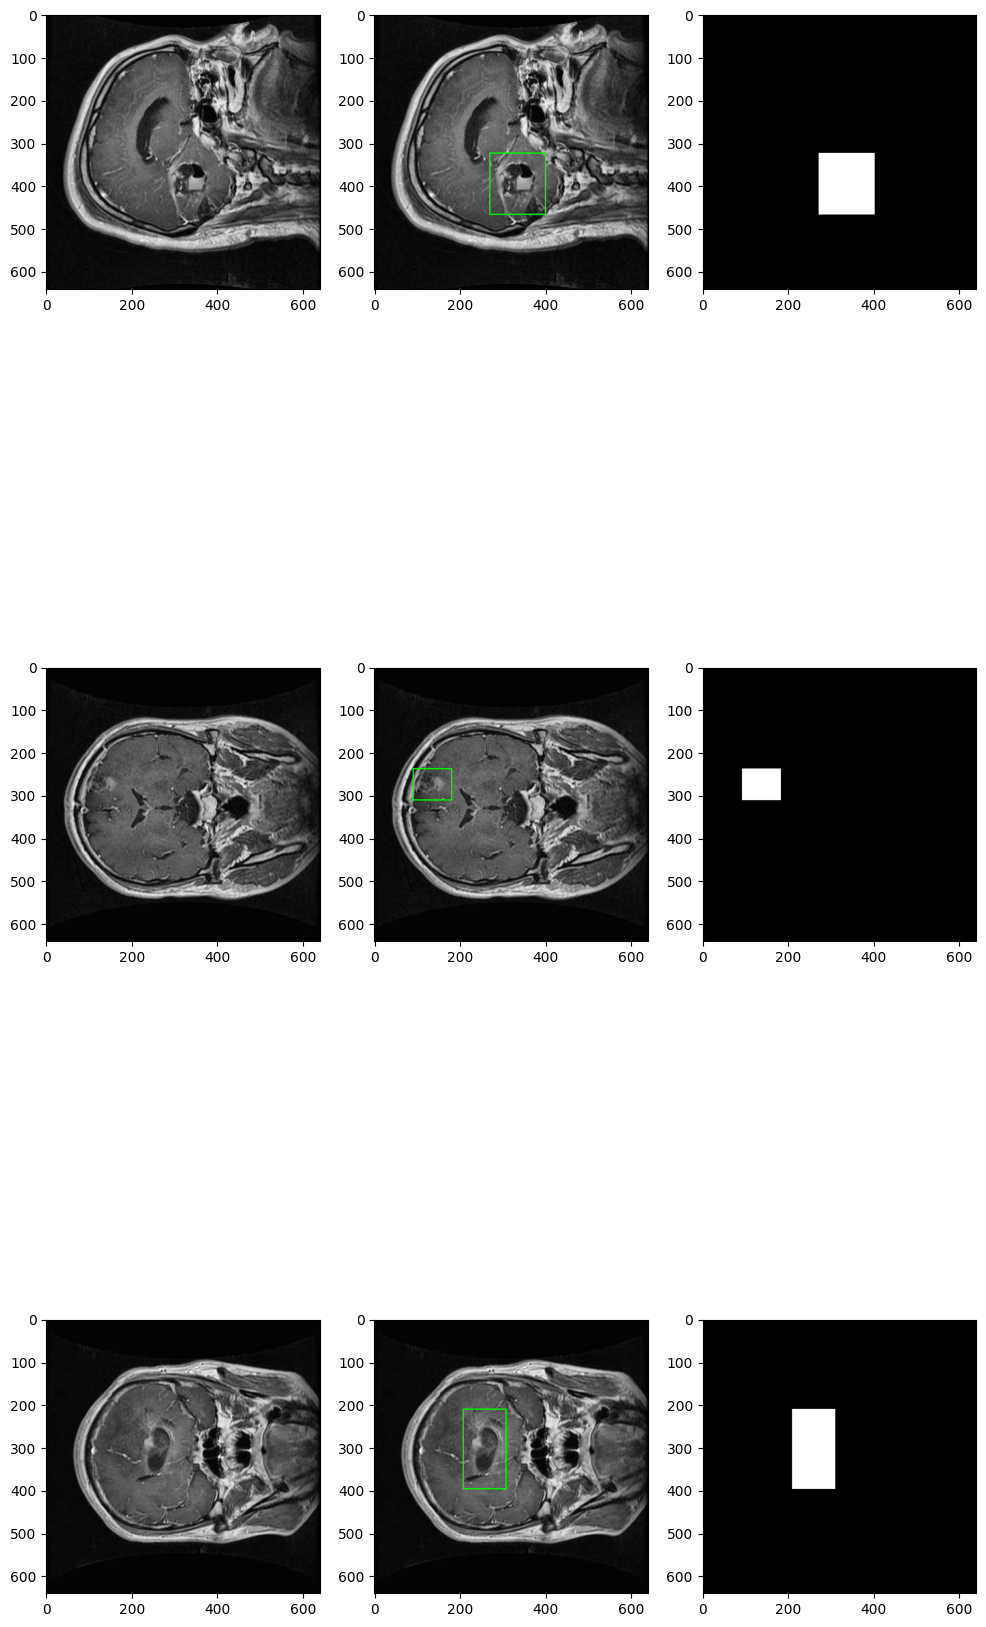

In [6]:
import matplotlib.pyplot as plt

def visualize_random_images(n=3): # select n random images

  # use cv and plt to show these images
  indices = np.random.randint(0, len(train_annotation['images']), size=n)

    #Image and Annotation Retrieval:
  images =[train_annotation['images'][i] for i in indices ]
  annotations = [train_annotation['annotations'][i] for i in indices ]
    
  j=1
  plt.figure(figsize=(12, 4 * 2 * n))
  for img,ann in zip(images,annotations):
    
    plt.subplot(n,3,j)
    j+=1
    image = cv2.imread(train_path + img['file_name'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    
    # create masked images from annotations
    segmentation = ann['segmentation']
    segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2) #convert 1D into 2D

    cv2.polylines(image, [segmentation], isClosed=True, color=(0, 255, 0), thickness=2)  # Green color with thickness 2

    plt.subplot(n,3,j)
    plt.imshow(image)
    j+=1
    
    mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    cv2.fillPoly(mask, [segmentation], color=1)
    plt.subplot(n,3,j)
    plt.imshow(mask,cmap='gray')
    j+=1

visualize_random_images()


# Apply Mask for all Image

In [7]:
def _train_masks():
    print('train masks')
    mask_dir = '/kaggle/working/train_masks/'
    os.makedirs(mask_dir, exist_ok=True)
    totalImages = len(train_annotation['images'])
    done = 0
    for img,ann in zip(train_annotation['images'],train_annotation['annotations']):
        path = train_path + img['file_name']
        mask_path = mask_dir + img['file_name']
        # load image in open cv
        image = cv2.imread(path)
        segmentation = ann['segmentation']
        segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        cv2.imwrite(mask_path, mask)
        done+=1
        print(f"train  {done} / {totalImages} ")

def _test_masks():
    print('test masks')

    totalImages = len(test_annotation['images'])
    done = 0
    mask_dir = '/kaggle/working/test_masks/'
    os.makedirs(mask_dir, exist_ok=True)
    
    for img,ann in zip(test_annotation['images'],test_annotation['annotations']):
        path = test_path + img['file_name']
        mask_path = mask_dir + img['file_name']
        # load image in open cv
        image = cv2.imread(path)
        segmentation = ann['segmentation']
        segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        cv2.imwrite(mask_path, mask)
        done+=1

        print(f"test  {done} / {totalImages} ")


def _val_masks():
    print('val masks')
    totalImages = len(valid_annotation['images'])
    done = 0
    mask_dir = '/kaggle/working/val_masks/'
    os.makedirs(mask_dir, exist_ok=True)
    
    for img,ann in zip(valid_annotation['images'],valid_annotation['annotations']):
        path = valid_path + img['file_name']
        mask_path = mask_dir + img['file_name']
        # load image in open cv
        image = cv2.imread(path)
        segmentation = ann['segmentation']
        segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        cv2.imwrite(mask_path, mask)
        done+=1
        print(f"val  {done} / {totalImages} ")


from threading import Thread
def make_masks():
  threads = []
  threads.append( Thread(target=_train_masks))

  threads.append( Thread(target=_test_masks))

  threads.append( Thread(target=_val_masks))
  for t in threads:
    t.start()
  for t in threads:
    t.join()
  print('complete')
  return

make_masks()

train masks
test masks
val masks
test  1 / 215 
train  1 / 1502 
val  1 / 429 
test  2 / 215 
train  2 / 1502 
val  2 / 429 
test  3 / 215 
train  3 / 1502 
val  3 / 429 
test  4 / 215 
train  4 / 1502 
val  4 / 429 
test  5 / 215 
test  6 / 215 
train  5 / 1502 
val  5 / 429 
test  7 / 215 
train  6 / 1502 
val  6 / 429 
test  8 / 215 
train  7 / 1502 
val  7 / 429 
train  8 / 1502 
test  9 / 215 
train  9 / 1502 
val  8 / 429 
test  10 / 215 
train  10 / 1502 
val  9 / 429 
val  10 / 429 
test  11 / 215 
train  11 / 1502 
val  11 / 429 
test  12 / 215 
train  12 / 1502 
val  12 / 429 
test  13 / 215 
train  13 / 1502 
test  14 / 215 
val  13 / 429 
train  14 / 1502 
val  14 / 429 
test  15 / 215 
train  15 / 1502 
val  15 / 429 
train  16 / 1502 
test  16 / 215 
val  16 / 429 
train  17 / 1502 
test  17 / 215 
train  18 / 1502 
val  17 / 429 
test  18 / 215 
train  19 / 1502 
val  18 / 429 
test  19 / 215 
test  20 / 215 
train  20 / 1502 
val  19 / 429 
test  21 / 215 
train  21 / 1

# Split Data

In [8]:
def load_data():
    target_size = (128, 128)
    train_mask_dir = '/kaggle/working/train_masks/'
    
    X_train =  [cv2.resize(cv2.imread(train_path + image['file_name']),target_size) for image in train_annotation['images']]
    y_train = [cv2.resize(cv2.imread(train_mask_dir + image['file_name'],cv2.IMREAD_GRAYSCALE),target_size ) for image in train_annotation['images']]
    X_train = np.array(X_train)
    y_train = np.expand_dims(np.array(y_train), axis=-1)
    
    X_train = X_train.astype('float32') / 255.0
    y_train = y_train.astype('float32') / 255.0
    y_train = (y_train > 0.5).astype(np.float32)
    
    

    

    val_mask_dir = '/kaggle/working/val_masks/'
    X_val =  [cv2.resize(cv2.imread(valid_path + image['file_name']),target_size) for image in valid_annotation['images']]
    y_val = [cv2.resize(cv2.imread(val_mask_dir + image['file_name'],cv2.IMREAD_GRAYSCALE),target_size) for image in valid_annotation['images']]
    X_val = np.array(X_val)
    y_val = np.expand_dims(np.array(y_val), axis=-1)

    X_val = X_val.astype('float32') / 255.0
    y_val = y_val.astype('float32') / 255.0
    y_val = (y_val > 0.5).astype(np.float32)
    
    return X_train,y_train,X_val,y_val



def load_test_data():
    target_size = (128, 128)

    test_mask_dir = '/kaggle/working/test_masks/'
    X_test =  [cv2.resize(cv2.imread(test_path + image['file_name']),target_size) for image in test_annotation['images']]
    y_test = [cv2.resize(cv2.imread(test_mask_dir + image['file_name'],cv2.IMREAD_GRAYSCALE),target_size) for image in test_annotation['images']]
    X_test = np.array(X_test)
    y_test = np.expand_dims(np.array(y_test), axis=-1)

        
    X_test = X_test.astype('float32') / 255.0
    y_test = y_test.astype('float32') / 255.0
    y_test = (y_test > 0.5).astype(np.float32)
    return X_test,y_test

In [9]:
X_train,y_train,X_val,y_val = load_data()


# Segmentation Model

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

# Define the FCN model
def build_fcn_model():
    inputs = layers.Input(shape=(128, 128, 3))
    
    # Encoder
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    
    # Bottleneck
    x = layers.Conv2D(512, 3, activation="relu", padding="same")(x)
    
    # Decoder
    x = layers.Conv2DTranspose(256, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, strides=2, activation="relu", padding="same")(x)
    
    # Output layer
    outputs = layers.Conv2D(1, 1, activation="sigmoid")(x)
    
    # FCN model
    fcn_model = tf.keras.Model(inputs, outputs, name="FCN")
    return fcn_model

In [14]:
# Build the FCN model
fcn_model = build_fcn_model()

In [15]:
# Compile the model
fcn_model.compile(optimizer="adam", loss="BinaryCrossentropy", metrics=["accuracy"])

In [16]:
# Print the model summary
fcn_model.summary()

Model: "FCN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 256)       295168  

In [17]:
from keras.callbacks import EarlyStopping
                            
# Define EarlyStopping callback
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Callback list
callbacks_list = [earlystop]

#unet_model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val),callbacks=callbacks_list)

In [18]:
# Train the model
fcn_model.fit(X_train, y_train, 
              epochs=50, 
              validation_data=(X_val, y_val), 
              callbacks=callbacks_list)

Epoch 1/50
47/47 [==============================] - 69s 1s/step - loss: 0.2369 - accuracy: 0.9605 - val_loss: 0.1384 - val_accuracy: 0.9627
Epoch 2/50
47/47 [==============================] - 69s 1s/step - loss: 0.1328 - accuracy: 0.9628 - val_loss: 0.1279 - val_accuracy: 0.9627
Epoch 3/50
47/47 [==============================] - 69s 1s/step - loss: 0.1265 - accuracy: 0.9628 - val_loss: 0.1229 - val_accuracy: 0.9627
Epoch 4/50
47/47 [==============================] - 69s 1s/step - loss: 0.1221 - accuracy: 0.9628 - val_loss: 0.1266 - val_accuracy: 0.9627
Epoch 5/50
47/47 [==============================] - 70s 1s/step - loss: 0.1208 - accuracy: 0.9628 - val_loss: 0.1190 - val_accuracy: 0.9627
Epoch 6/50
47/47 [==============================] - 69s 1s/step - loss: 0.1164 - accuracy: 0.9628 - val_loss: 0.1127 - val_accuracy: 0.9627
Epoch 7/50
47/47 [==============================] - 69s 1s/step - loss: 0.1121 - accuracy: 0.9628 - val_loss: 0.1084 - val_accuracy: 0.9627
Epoch 8/50
47/47 [==

# Prediciton

In [19]:
def predict(image_path, model, threshold=0.5):
    
    # Read and preprocess the image
    image = cv2.imread(image_path)
    print("Original Image Shape:", image.shape)
    
    # Resize the image to match model's expected sizing
    resized_image = cv2.resize(image, (128, 128))
    print("Resized Image Shape:", resized_image.shape)
    
    # Expand dimensions to match the batch size used by the model
    input_image = np.expand_dims(resized_image, axis=0)
    
    # Preprocess input (normalize to [0, 1] range)
    input_image = input_image.astype('float32') / 255.0
    
    # Perform prediction
    pred_mask = model.predict(input_image)
    
    # Apply threshold to prediction mask
    pred_mask[pred_mask >= threshold] = 1  # set values >= threshold to 1 (foreground)
    pred_mask[pred_mask < threshold] = 0   # set values < threshold to 0 (background)
    
    # If your model outputs probabilities, you might need to squeeze the mask
    pred_mask = np.squeeze(pred_mask, axis=0)
    
    # Count number of pixels where mask is 1 (foreground)
    num_pixels = np.count_nonzero(pred_mask)
    print("shape mask",pred_mask.shape)
    return pred_mask


# Show Result

Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 [==============================] - 0s 56ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 [==============================] - 0s 37ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 [==============================] - 0s 42ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 [==============================] - 0s 38ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 [==============================] - 0s 37ms/step
shape mask (128, 128, 1)


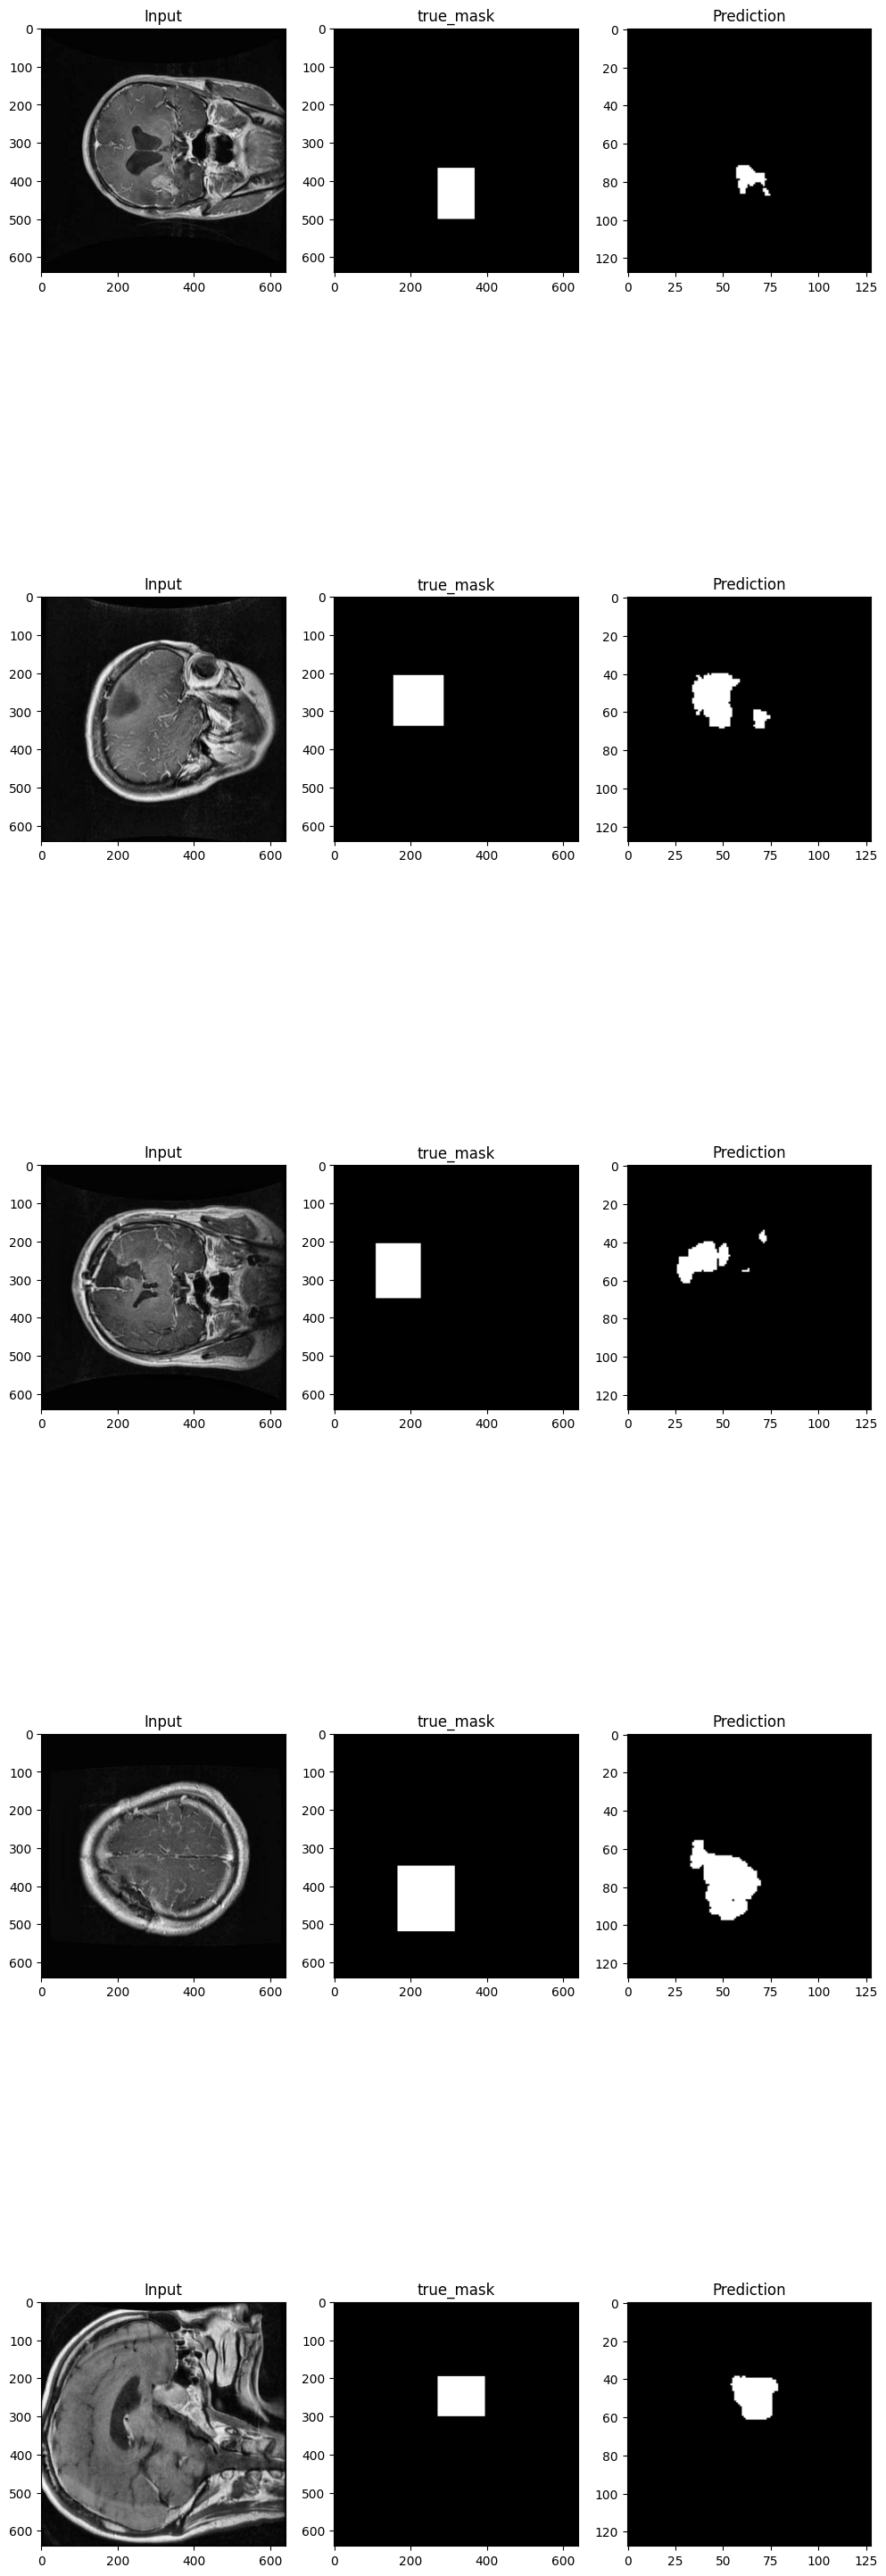

In [43]:
import matplotlib.pyplot as plt
def test_random_images(n=5):
  # select n random images
  # use cv and plt to show these images
    test_mask_dir = '/kaggle/working/test_masks/'

    indices = np.random.randint(0, len(test_annotation['images']), size=n)

    images =[test_annotation['images'][i] for i in indices ]

    annotations = [test_annotation['annotations'][i] for i in indices ]
    j=1
    plt.figure(figsize=(12, 4 * 2 * n))
    for img,ann in zip(images,annotations):
        plt.subplot(n,3,j)
        j+=1
        image = cv2.imread(test_path + img['file_name'])
        
        plt.imshow(image)
        plt.title("Input")
        mask = predict(test_path + img['file_name'],fcn_model)
        
        result_image = np.zeros((128, 128,1), dtype=np.uint8)
        result_image[mask == 1] = 255
        
        true_mask = cv2.imread(test_mask_dir + img['file_name'])
        plt.subplot(n,3,j)
        j+=1
        plt.imshow(true_mask)
        plt.title("true_mask")
        
        plt.subplot(n,3,j)
        j+=1
        plt.imshow(result_image,cmap='gray')
        plt.title("Prediction")

test_random_images()

Confusion Matrix

14/14 [==============================] - 5s 381ms/step


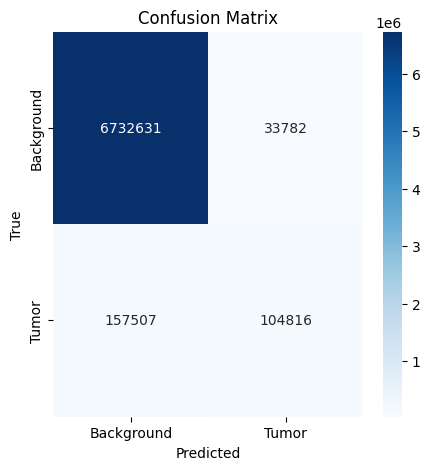

Classification Report:
               precision    recall  f1-score   support

  Background       0.98      1.00      0.99   6766413
       Tumor       0.76      0.40      0.52    262323

    accuracy                           0.97   7028736
   macro avg       0.87      0.70      0.75   7028736
weighted avg       0.97      0.97      0.97   7028736



array([[6732631,   33782],
       [ 157507,  104816]], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred):
    # Flatten the images for the confusion matrix
    y_true_flat = y_true.flatten()
    y_pred_flat = (y_pred.flatten() > 0.5).astype(int)  # Convert to binary mask

    # Compute confusion matrix
    cm = confusion_matrix(y_true_flat, y_pred_flat)
    
    # Visualize confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Background", "Tumor"], yticklabels=["Background", "Tumor"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Generate and print classification report (includes precision, recall, f1-score, etc.)
    report = classification_report(y_true_flat, y_pred_flat, target_names=["Background", "Tumor"])
    print("Classification Report:\n", report)
    
    return cm

# Example usage
# Make predictions on validation data
y_pred_val = fcn_model.predict(X_val)
evaluate_model(y_val, y_pred_val)


Dice Similarity Coefficient (DSC)

In [27]:
def dice_coefficient(y_true, y_pred):
    smooth = 1e-6  # To prevent division by zero
    intersection = np.sum(y_true * y_pred)
    return (2 * intersection + smooth) / (np.sum(y_true) + np.sum(y_pred) + smooth)

# Example usage
dsc = dice_coefficient(y_val, y_pred_val)
print("Dice Coefficient: ", dsc)


Dice Coefficient:  0.48171655282625253


IoU (Intersection over Union)

In [23]:
def iou_score(y_true, y_pred):
    smooth = 1e-6
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return (intersection + smooth) / (union + smooth)

# Example usage
iou = iou_score(y_val, y_pred_val)
print("IoU Score: ", iou)


IoU Score:  0.3172770892841994


Visualizing Results

Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 [==============================] - 0s 47ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 [==============================] - 0s 44ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 [==============================] - 0s 40ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 [==============================] - 0s 34ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 [==============================] - 0s 36ms/step
shape mask (128, 128, 1)


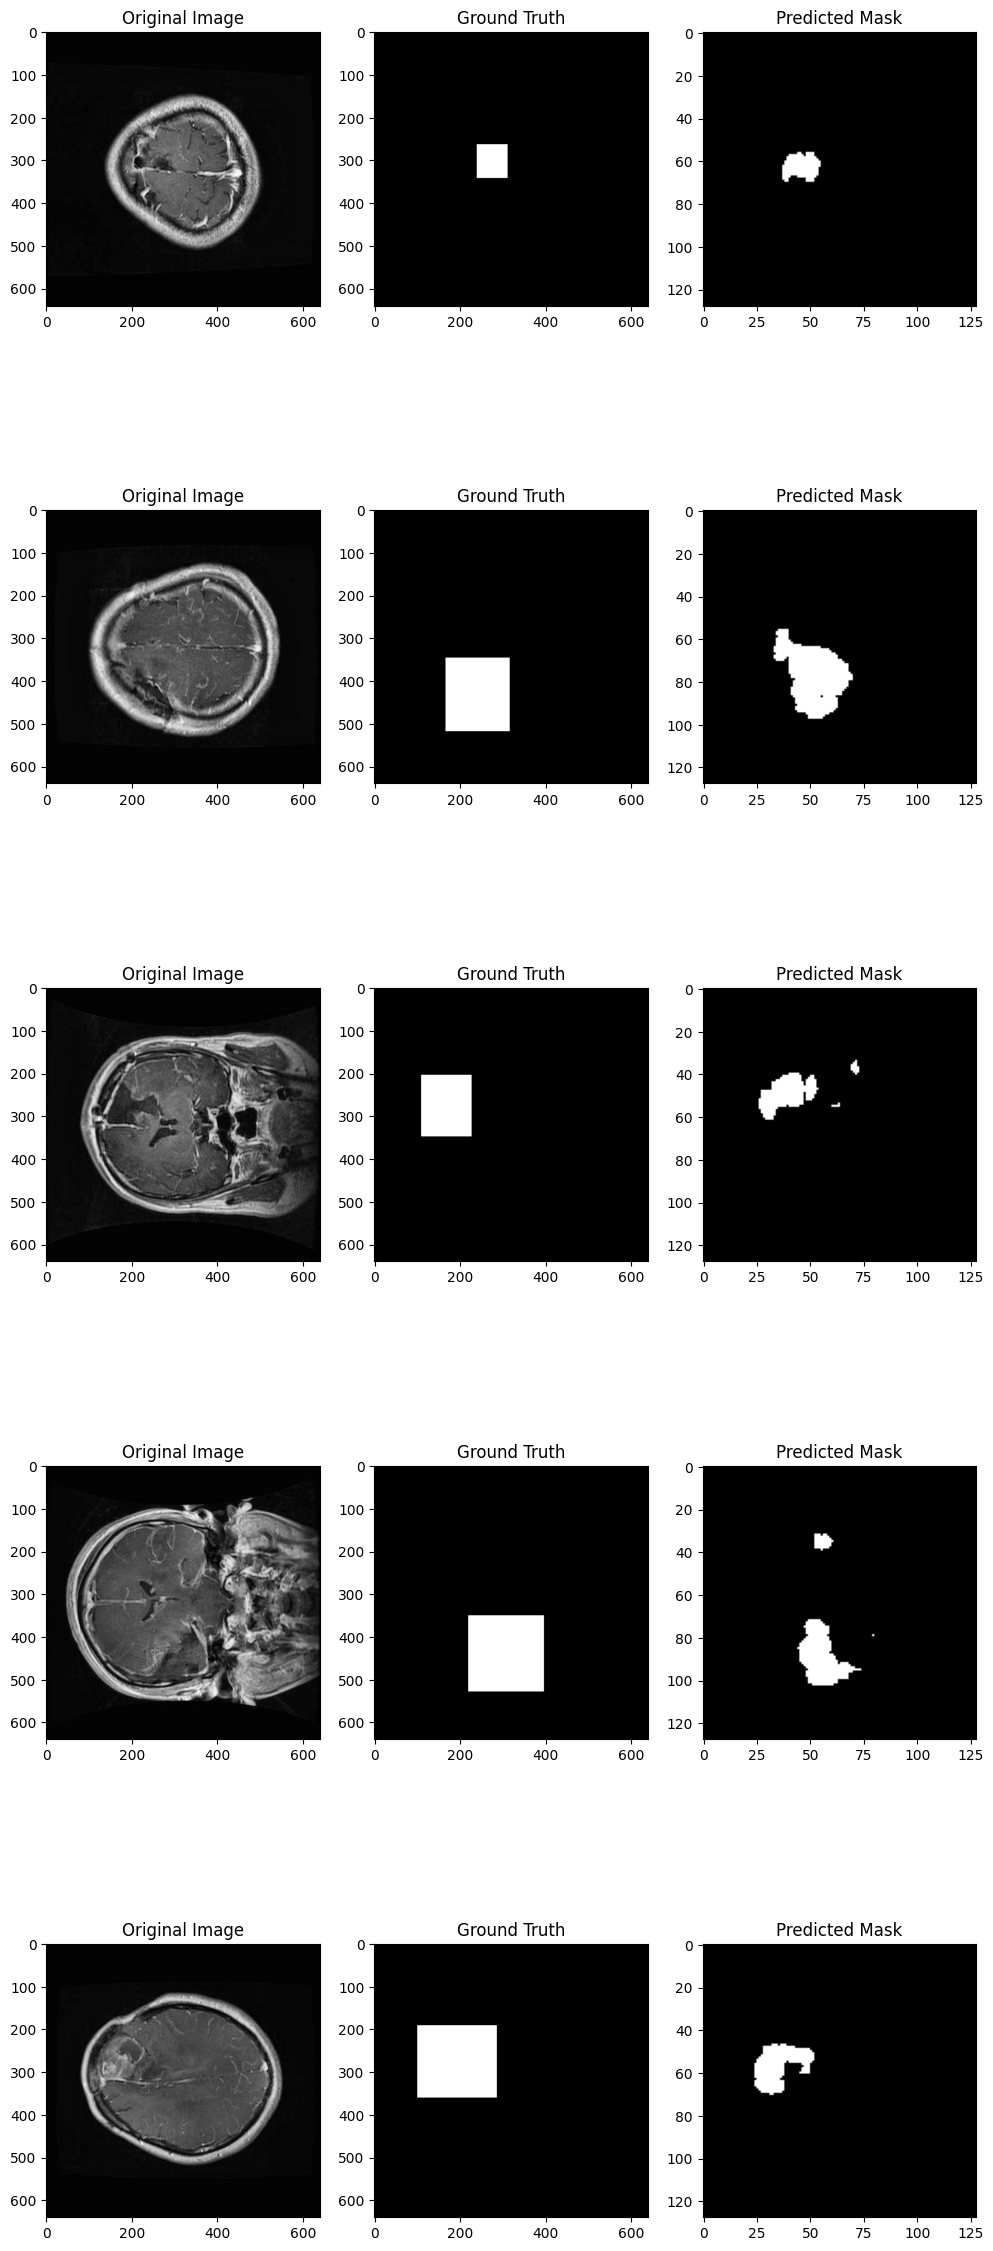

In [39]:
def visualize_predictions(n=5):
    indices = np.random.randint(0, len(test_annotation['images']), size=n)
    images = [test_annotation['images'][i] for i in indices]
    annotations = [test_annotation['annotations'][i] for i in indices]
    
    plt.figure(figsize=(12, 6 * n))
    
    for i, (img, ann) in enumerate(zip(images, annotations)):
        # Load and preprocess image
        image = cv2.imread(test_path + img['file_name'])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Create the ground truth mask
        segmentation = np.array(ann['segmentation'][0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        
        # Prediction mask
        pred_mask = predict(test_path + img['file_name'], fcn_model)
        
        # Plot original image, ground truth, and prediction
        plt.subplot(n, 3, 3 * i + 1)
        plt.imshow(image)
        plt.title("Original Image")
        
        plt.subplot(n, 3, 3 * i + 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Ground Truth")
        
        plt.subplot(n, 3, 3 * i + 3)
        plt.imshow(pred_mask, cmap='gray')
        plt.title("Predicted Mask")
    
    plt.show()

# Example usage
visualize_predictions(n=5)


Save Model

In [ ]:
fcn_model.save('fcnModel.h5')

# from tensorflow.keras.models import load_model

# # Load the saved model
# loaded_model = load_model("brain_tumor_model.h5")